In [1]:
import selenium.webdriver as selWeb
from bs4 import BeautifulSoup
import requests
import re
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import platform
rc('font', family='AppleGothic')
import time
from termcolor import colored
import tqdm

%load_ext autoreload
%autoreload 2

In [2]:

def bump():
    wc.comp_lst.append(webb.comp_lst)
#     wc.user_lst.append(webb.user_lst)
    wc.dept_lst.append(webb.dept_lst)
    wc.titl_lst.append(webb.titl_lst)
    wc.dat1_lst.append(webb.dat1_lst)
    wc.diff_lst.append(webb.diff_lst)
    wc.dat2_lst.append(webb.dat2_lst)
    wc.rout_lst.append(webb.rout_lst)
    wc.head_lst.append(webb.head_lst)
    wc.ress_lst.append(webb.ress_lst)
    wc.good_lst.append(webb.good_lst)
    wc.mask_lst.append(webb.mask_lst)
    wc.fell_lst.append(webb.fell_lst)
    wc.took_lst.append(webb.took_lst)
    wc.total_lst = [wc.comp_lst, wc.dept_lst, wc.titl_lst, wc.dat1_lst, wc.diff_lst, wc.dat2_lst, wc.rout_lst, \
 			 wc.head_lst, wc.mask_lst, wc.took_lst, wc.fell_lst, wc.ress_lst, wc.good_lst]
    
def create_table():#company_lst, position_lst, title_lst, record_date_lst, difficulty_lst, interview_date_lst, channel_lst, headline_lst, interview_res_lst, interview_exp_lst, interview_question_lst, answer_thought_lst, announce_duration_lst):
    comp_lst = sum(wc.comp_lst, [])
#     user_lst = sum(wc.user_lst, [])
    dept_lst = sum(wc.dept_lst, [])
    titl_lst = sum(wc.titl_lst, [])
    dat1_lst = sum(wc.dat1_lst, [])
    diff_lst = sum(wc.diff_lst, [])
    dat2_lst = sum(wc.dat2_lst, [])
    rout_lst = sum(wc.rout_lst, [])
    head_lst = sum(wc.head_lst, [])
    ress_lst = sum(wc.ress_lst, [])
    good_lst = sum(wc.good_lst, [])
    mask_lst = sum(wc.mask_lst, [])
    fell_lst = sum(wc.fell_lst, [])
    took_lst = sum(wc.took_lst, [])
    
#     dat1_lst = [datetime.datetime.strptime(i, '%Y%m%d').date() for i in dat1_lst]
    
    df = pd.DataFrame()
    df['company'] = comp_lst
#     df['user_id'] = user_lst
    df["dptment"] = dept_lst
    df["title"] = titl_lst
    df["jp_date"] = dat1_lst
    df["difficult"] = diff_lst
    df["on_date"] = dat2_lst
    df["route"] = rout_lst
    df["headline"] = head_lst
    df["question"] = mask_lst
    df["thought"] = fell_lst
    df["duration"] = took_lst
    df["result"] = ress_lst
    df["experience"] = good_lst
    
    df['jp_date'] = df['jp_date'].astype("datetime64[ns]")
    df['on_date'] = df['on_date'].astype("datetime64[ns]")

    df = df.drop_duplicates()
    print(df.shape)
    return df

# 1. 데이터 수집하는 프로그램
- 잡플래닛에서 데이터 수집하는 프로그램
- 동종업계 및 일하고 싶은 회사 리스트 만들기
- 리스트에 있는 회사에 면접을 본 사람들의 데이터 수집하기
- 데이터 전치리 및 클린징
- 데이터 형태로 변환

## 1-1.회사 리스트 만들기

- 잡플래닛 기업 만족도 순위
    - https://www.jobplanet.co.kr/companies?sort_by=review_avg_cache

#### 직접 구현한 프로그램 불러오기

In [3]:
import web_crawl as wc
from web_crawl import web

#### 잡 플래닛에 접근하기

In [4]:
jobplanet_id = wc.jobplanet_id
jobplanet_pw = wc.jobplanet_pw
login_url = wc.login_url

login_data = {'user': {'email':jobplanet_id, 'password':jobplanet_pw, 'remember_me':'true'}}
client = requests.session()
login_res = client.post(login_url, json = login_data)

print(login_res.content.decode('utf-8'))
index = client.get(login_url)

{"success":true,"redirect_url":"https://www.jobplanet.co.kr/"}


In [5]:
def comp_name_id(comp_name):
    name_lst = []
    id_lst = []
    
    for i in comp_name:
        name = str(i).split('>')[2][:-3]
        comp_id = str(i).split('/')[2]
        name_lst.append(name)
        id_lst.append(comp_id)
    return name_lst, id_lst

def comp_info(comp_dept):
    dept_lst = []
    loc_lst = []
    review_lst = []
    salary_lst = []
    interview_lst =[]
    avg_lst =[]

    for i in comp_dept:
        # 회사 이름
        if '''<span class="us_stxt_1">''' in str(i):
            dept = str(i).split('>')[1][:-6]
            dept_lst.append(dept)
        # 회사 위치
        elif '''href="">''' in str(i): 
            reg = str(i).split('>')[1][:-6]
            loc_lst.append(reg)
        # 기업 리뷰 정보 개수
        elif '''기업리뷰''' in str(i):
            rev = str(i).split('>')[1][:-3].split(' ')[0]
            review_lst.append(rev)
        # 기업 연봉 정보 개수
        elif '''연봉정보''' in str(i):
            sal = str(i).split('>')[1][:-3].split(' ')[0]
            salary_lst.append(sal)
        # 기업 면접 정보 개수
        elif '''면접정보''' in str(i):
            interview = str(i).split('>')[1][:-3].split(' ')[0]
            interview_lst.append(interview)
        # 기업 평균 연봉 (만원)
        elif '''평균''' in str(i):
            avg_sal = str(i).split('>')[2].split('<')[0]
            avg_lst.append(avg_sal)
    return [dept_lst, loc_lst, review_lst, salary_lst, interview_lst, avg_lst]

def total_page(interview_lst):
    page_lst = []
    for i in interview_lst:
        num = int(i)
        if num % 5 == 0:
            page = int(num // 5)
            page_lst.append(page)
        else:
            page = int(num // 5) + 1
            page_lst.append(page)
    return page_lst

#### 기업 테이블 생성하기
- 잡 플래닛의 "총 만족도 순위" 참조
- https://www.jobplanet.co.kr/companies?sort_by=review_avg_cache

In [6]:
name_lst = []
id_lst = []

dept_lst = []
loc_lst = []
review_lst = []
salary_lst = []
interview_lst = []
avg_lst = []

page_lst = []


for i in range(1, 101):
    url = "https://www.jobplanet.co.kr/companies?sort_by=review_avg_cache&page={}".format(i)
    response = client.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    comp_name = soup.select('.us_titb_l3')
    
    names, ids =  comp_name_id(comp_name)
    name_lst.append(names)
    id_lst.append(ids)

    comp_dept = soup.select('.us_stxt_1')
    info = comp_info(comp_dept)
    dept_lst.append(info[0])
    loc_lst.append(info[1])
    review_lst.append(info[2])
    salary_lst.append(info[3])
    interview_lst.append(info[4])
    avg_lst.append(info[5])

name_lst = sum(name_lst, [])
id_lst = sum(id_lst, [])
dept_lst = sum(dept_lst, [])
loc_lst = sum(loc_lst, [])
review_lst = sum(review_lst, [])
salary_lst = sum(salary_lst, [])
interview_lst = sum(interview_lst, [])
avg_lst = sum(avg_lst, [])
total_page = total_page(interview_lst)

config = pd.DataFrame({'company': name_lst,
                       'comp_id': id_lst,
                       'type': dept_lst,
                       'region': loc_lst,
                       'review_cnt': review_lst,
                       'salary_cnt': salary_lst,
                       'interview_cnt': interview_lst,
                       'total_page': total_page,
                       'avg_salary': avg_lst})

print(config.shape)
config

(1000, 9)


,company,comp_id,type,region,review_cnt,salary_cnt,interview_cnt,total_page,avg_salary
0,페이스북코리아(유),90364,IT/웹/통신,서울,48,111,40,8,"14,001"
1,애터미(주),112614,유통/무역/운송,충남,25,7,49,10,"7,748"
2,버즈빌(주),313882,IT/웹/통신,서울,30,24,44,9,"3,751"
3,(사)금융보안원,308098,기관/협회,경기,22,33,8,2,"8,008"
4,라이엇게임즈코리아,89723,IT/웹/통신,해외,38,33,43,9,"6,337"
5,드라마앤컴퍼니(주),80176,IT/웹/통신,서울,27,7,29,6,"3,509"
6,케이에스에스해운(주),53479,유통/무역/운송,서울,27,17,13,3,"8,554"
7,유니티테크놀로지스코리아(유),94877,IT/웹/통신,서울,26,9,17,4,"5,128"
8,(주)에이스프로젝트,95319,IT/웹/통신,서울,42,64,49,10,"3,237"
9,한국가스공사,3792,제조/화학,대구,248,275,162,33,"4,468"


## 1-2. 데이터 생성
- 직접 구현한 프로그램으로 웹에서 데이터 수집
- 수집한 데이터 정제 및 전처리
- 데이터 Qualification 체크 및 최종 확인
- 데이터 형태로 산출하기

#### 직접 구현 프로그램 불러오기

In [7]:
import web_crawl as wc
from web_crawl import web

#### 데이터 생성

In [9]:
%%time

# page = cdf['total_page']
# coID = cdf['comp_id']
# coNM = cdf['company']

page = config['total_page']
coID = config['comp_id']
coNM = config['company']


for num in range(0, len(config)): 

    progress_bar = tqdm.tqdm(total=config['total_page'].iloc[num],
                             desc=config['company'].iloc[num], 
                             position=0)
    
    # 1 페이지 마다 5개의 리뷰가 작성 되어 있음
    for i in range(0, page.iloc[num]):
        url = "https://www.jobplanet.co.kr/companies/{}/interviews/{}?page={}\
              ".format(coID.iloc[num], coNM.iloc[num], i+1)
        response = client.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        company = coNM.iloc[num]####
        
        webb = web(soup, company)
        all_info = soup.find_all('div', {'class': 'content_wrap'})
        if len(all_info) == 0:
            break
        else:      
#             company = coNM.iloc[num]
            webb.crawl(soup, company)
            bump()
        progress_bar.update(1)

(주)현진스포텍: 100%|██████████| 8/8 [00:14<00:00,  1.72s/it]it]

CPU times: user 11min 6s, sys: 7.71 s, total: 11min 13s
Wall time: 5h 46min 56s


In [8]:
def create_table():#company_lst, position_lst, title_lst, record_date_lst, difficulty_lst, interview_date_lst, channel_lst, headline_lst, interview_res_lst, interview_exp_lst, interview_question_lst, answer_thought_lst, announce_duration_lst):
    comp_lst = sum(wc.comp_lst, [])
#     user_lst = sum(wc.user_lst, [])
    dept_lst = sum(wc.dept_lst, [])
    titl_lst = sum(wc.titl_lst, [])
    dat1_lst = sum(wc.dat1_lst, [])
    diff_lst = sum(wc.diff_lst, [])
    dat2_lst = sum(wc.dat2_lst, [])
    rout_lst = sum(wc.rout_lst, [])
    head_lst = sum(wc.head_lst, [])
    ress_lst = sum(wc.ress_lst, [])
    good_lst = sum(wc.good_lst, [])
    mask_lst = sum(wc.mask_lst, [])
    fell_lst = sum(wc.fell_lst, [])
    took_lst = sum(wc.took_lst, [])
    
#     dat1_lst = [datetime.datetime.strptime(i, '%Y%m%d').date() for i in dat1_lst]
    
    df = pd.DataFrame()
    df['company'] = comp_lst
#     df['user_id'] = user_lst
    df["dptment"] = dept_lst
    df["title"] = titl_lst
    df["jp_date"] = dat1_lst
    df["difficult"] = diff_lst
    df["on_date"] = dat2_lst
    df["route"] = rout_lst
    df["headline"] = head_lst
    df["question"] = mask_lst
    df["thought"] = fell_lst
    df["duration"] = took_lst
    df["result"] = ress_lst
    df["experience"] = good_lst
    
    df['jp_date'] = df['jp_date'].astype("datetime64")
    df['on_date'] = df['on_date'].astype("datetime64")

    print(df.shape)
    return df


def create_table_test():
    #df = pd.DataFrame
    return wc.total_lst

def check_table():#company_lst, position_lst, title_lst, record_date_lst, difficulty_lst, interview_date_lst, channel_lst, headline_lst, interview_res_lst, interview_exp_lst, interview_question_lst, answer_thought_lst, announce_duration_lst):
    comp_lst = sum(wc.comp_lst, [])
#     user_lst = sum(wc.user_lst, [])
    dept_lst = sum(wc.dept_lst, [])
    titl_lst = sum(wc.titl_lst, [])
    dat1_lst = sum(wc.dat1_lst, [])
    diff_lst = sum(wc.diff_lst, [])
    dat2_lst = sum(wc.dat2_lst, [])
    rout_lst = sum(wc.rout_lst, [])
    head_lst = sum(wc.head_lst, [])
    ress_lst = sum(wc.ress_lst, [])
    good_lst = sum(wc.good_lst, [])
    mask_lst = sum(wc.mask_lst, [])
    fell_lst = sum(wc.fell_lst, [])
    took_lst = sum(wc.took_lst, [])
    
#     dat1_lst = [datetime.datetime.strptime(i, '%Y%m%d').date() for i in dat1_lst]
    
    print(len(comp_lst), len(dept_lst),len(titl_lst),len(dat1_lst),len(diff_lst),len(dat2_lst),len(rout_lst),len(head_lst),len(mask_lst),len(fell_lst),len(took_lst),len(ress_lst),len(good_lst))


#### data evaluation 

In [11]:
cnt = 0
for i in config.interview_cnt:
    cnt += int(i)
cnt

45650

In [12]:
check_table()

45599 45599 45599 45599 45599 45599 45599 45599 45599 45599 45599 45599 45599


In [13]:
df = create_table()
df.head()

(45599, 13)


,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience
0,(주)포스코케미칼,생산/제조,사원-고졸,2019-11-22,쉬움,2017-12-01,학교취업지원센터,면접분위기는 아주 좋아요. 덕담 많이해주십니다.,"면접질문도 쉬워요 포항지진에 대해 어떻게 생각하냐, 누구에게 가장 먼저 전화했냐 등","안전불감증에대해 말함, 부모님에게 가장먼저전화",20.0,합격,긍정적
1,(주)포스코케미칼,생산/제조,사원-대졸,2019-11-04,어려움,2018-06-01,공개채용,서류전형-인적성평가-1차면접-2차면접-최종합격,1. 해당 분야에서 일하고 싶은 이유?. 전공 관련 법규 질문(~3가지)3. 해당 ...,1. 평소 가지고 있던 생각을 풀어서 이야기함. 관련 법규에 대한 사전 지식 습득...,NaN,합격,보통
2,(주)포스코케미칼,영업/제휴,사원-대졸,2019-10-20,보통,2018-11-01,공개채용,"메일로 면접일자 통보 &gt; 포항공대 1차면접(그룹면접, PT면접)&gt; 2차면...",1분동안 회사에 대해 아는대로 말해보라.,홈페이지와 신문에서 본 내용을 외워 말씀드렸으나 긴장한 탓에 계속 말하지 못함.3...,25.0,합격,긍정적
3,(주)포스코케미칼,생산/제조,사원-고졸,2019-09-24,보통,2018-08-01,학교취업지원센터,"대기업 시스템이 어떻게 돌아가는지 알 수 있게 되었고, 다양한 사람들과 인간관계를 ...",담배값 인상에 대해 흡연자들에게 미치는 영향이 긍정적이라고 생각하는지,긍정적인 면과 부정적인 면 다 공존한다고 생각한다.,30.0,합격,보통
4,(주)포스코케미칼,생산관리/품질관리,사원-대졸,2019-09-04,쉬움,2018-07-01,공개채용,"인적성-1차면접(직무,토의,인성)-2차면접(임원)으로 이루어지며 압박면적은 아닙니다...","협업 경험, 도전 경험, 문제해결 경험 등 일반적인 질문을 던지고 꼬리질문 형식","대학경험, 인턴, 아르바이트 경험 등 다양한 개인의 경험을 인재상에 투영하되 나름...",NaN,합격,긍정적


#### 데이터 로컬로 저장

용량/시간 비용으로 프로그램을 3개로 나눠 데이터를 추출함
- part1 : 1 ~ 10 page의 회사 데이터 추출 (1시간)
- part1 : 11 ~ 50 page의 회사 데이터 추출 (5시간)
- part1 : 51 ~ 100 page의 회사 데이터 추출 (6시간)

In [15]:
# part1 (1, 11)
# part2 (11, 51)
# part3 (51, 101)
df.to_csv('job_market_part2.csv', index = False )

#### 로컬에 저장한 데이터 다시 불러오기

In [9]:
job_df = pd.read_csv('job_market_final.csv')
print(job_df.shape)
job_df.head(3)

(104211, 17)


,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary
0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001"
1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001"
2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001"


In [21]:
type(job_df.on_date.iloc[0])

str

In [30]:
def year_month(job_df):
    year_lst = []
    mon_lst = []

    for i in job_df.on_date:
        if i == np.nan:
            year = i
            mon = i
            year_lst.append(year)
            mon_lst.append(mon)
        else:
            try:
                year = i[:4]
                mon = i[5:7]
                year_lst.append(year)
                mon_lst.append(mon)
            except TypeError:
                year = i
                mon = i
                year_lst.append(year)
                mon_lst.append(mon)
    print(len(year_lst), len(mon_lst))
    return year_lst, mon_lst

In [31]:
year_lst, mon_lst = year_month(job_df)

104211 104211


In [32]:
job_df['year'] = year_lst
job_df['month'] = mon_lst

,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary,year,month
0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001",2019,08
1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2019,04
2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001",2019,01
3,페이스북코리아(유),경영/기획/컨설팅,대리,2019-07-09,어려움,NaN,헤드헌터,폰스크리닝/ 실무 면접 진행 영어로도 질문하고 한국어로도 한다,지원동기와 왜 이업무를 잘할 수 있는지와 베스트 케이스 발표,업무 경력에 맞게 풀어서 대답하였고 솔직한 답변으로 답변,7.0,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",NaN,NaN
4,페이스북코리아(유),마케팅/시장조사,과장,2019-05-31,어려움,2017-04-01,기타,리크루터로부터 연락 오고 짧은 전화 인터뷰 후 1차 면접을 경력과 기술 면접 1차 ...,경력에 관한 질문과 페이스북에서 실제로 직면 한 문제들을 어떻게 풀어갈 것 인지 물어봄,"경력중에서 업무와 관련 된 것을 자세히 대답 했고, 페이스북 sign-up pro...",3.0,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2017,04


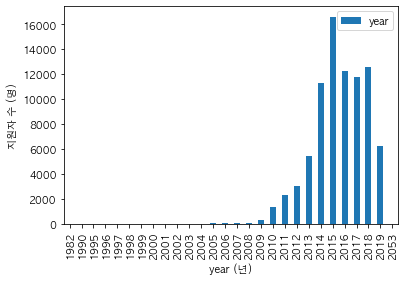

In [48]:
check_year = pd.DataFrame(job_df.year.value_counts(sort = True))
check_year = check_year.sort_index(ascending = True)
ax = check_year.plot(kind = 'bar')
ax.set_xlabel('year (년)')
ax.set_ylabel('지원자 수 (명)')
plt.show()

#### 2019년 데이터만 쿼리

In [199]:
df = job_df[job_df.year == "2019"]
df = df.reset_index()
df.head()

,index,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary,year,month
0,0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001",2019,08
1,1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2019,04
2,2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001",2019,01
3,41,애터미(주),경영/기획/컨설팅,부장,2019-02-19,어려움,2019-02-01,직원추천,인터뷰 이전에 애터미가 주관하는 행사를 직접 참여하여 애터미가 가지는 기업 이미지와...,애터미가 가지는 독특한 사업 형태에 대한 의견.꿈이 무엇인가라는 포괄적으로 인생을 ...,애터미는 다단계라는 편견 속에 있는 착한 기업이다. 착한 기업을 유지하는 것은 임...,NaN,합격,긍정적,112614,유통/무역/운송,충남,"7,748",2019,02
4,43,애터미(주),디자인,사원-대졸,2019-10-24,매우 어려움,2019-10-01,온라인지원,소개로 지원하여 1차 실무진 2차 임원 면접 진행. 인사팀이 면접에 대한 설명 부족...,1차에는 인사팀에서 기업에 맞는 사람인지 파악하려는 질문과 실무진은 현직장에서 하고...,내가 생각하는 범위 내에서 할 수 있는 대답을 하였고 종교는 무교라고 대답.,NaN,합격,부정적,112614,유통/무역/운송,충남,"7,748",2019,10


In [98]:
prov = pd.DataFrame(df.region.value_counts())


,region
서울,3485
경기,1226
대전,277
전남,188
인천,178
경남,146
충남,128
부산,126
경북,118
대구,72


In [181]:
# ! pip install folium

In [174]:
import folium
import json
from IPython.display import HTML
import os

cwd = str(os.getcwd())
geo_path = cwd + '/skorea-provinces.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [127]:
prov_lst = []
for i in prov.index:
    if i == '서울':
        pr = 'Seoul'
        prov_lst.append(pr)
    elif i == '경기':
        pr = 'Gyeonggi-do'
        prov_lst.append(pr)
    elif i == '대전':
        pr = 'Daejeon'
        prov_lst.append(pr)
    elif i == '전남':
        pr = 'Jeollanam-do'
        prov_lst.append(pr)
    elif i == '인천':
        pr = 'Incheon'
        prov_lst.append(pr)
    elif i == '경남':
        pr = 'Gyeongsangnam-do'
        prov_lst.append(pr)
    elif i == '충남':
        pr = 'Chungcheongnam-do'
        prov_lst.append(pr)
    elif i == '부산':
        pr = 'Busan'
        prov_lst.append(pr)
    elif i == '경북':
        pr = 'Gyeongsangbuk-do'
        prov_lst.append(pr)
    elif i == '제주':
        pr = 'Jeju'
        prov_lst.append(pr)
    elif i == '울산':
        pr = 'Ulsan'
        prov_lst.append(pr)
    elif i == '강원':
        pr = 'Gangwon-do'
        prov_lst.append(pr)
    elif i == '세종':
        pr = 'Sejong'
        prov_lst.append(pr)
    elif i == '충북':
        pr = 'Chungcheongbuk-do'
        prov_lst.append(pr)
    elif i == '광주':
        pr = 'Gwangju'
        prov_lst.append(pr)
    elif i == '전북':
        pr = 'Jeollabuk-do'
        prov_lst.append(pr)
    elif i == '해외':
        pr = 'overseas'
        prov_lst.append(pr)
    elif i == '대구':
        pr = 'Daegu'
        prov_lst.append(pr)
    else:
        pr = 'others'
        prov_lst.append(pr)
prov['reg'] = prov_lst
len(prov.index), len(prov_lst)

(19, 19)

In [154]:
color_lst = []
for i in prov.region:
    if i > 3000:
        co = 'red'
        color_lst.append(co)
    elif i > 1000 and i <= 3000:
        co = 'orage'
        color_lst.append(co)
    elif i > 200 and i <= 1000:
        co = 'blue'
        color_lst.append(co)
    elif i > 100 and i <= 200:
        co = 'green'
        color_lst.append(co)
    else:
        co = 'yellow'
        color_lst.append(co)
prov['color'] = color_lst

In [166]:
prov['count'] = np.log(prov['region'])
prov

,region,reg,color,count
서울,3485,Seoul,red,8.156223
경기,1226,Gyeonggi-do,orage,7.111512
대전,277,Daejeon,blue,5.624018
전남,188,Jeollanam-do,green,5.236442
인천,178,Incheon,green,5.181784
경남,146,Gyeongsangnam-do,green,4.983607
충남,128,Chungcheongnam-do,green,4.852030
부산,126,Busan,green,4.836282
경북,118,Gyeongsangbuk-do,green,4.770685
대구,72,Daegu,yellow,4.276666


In [179]:
the_map = folium.Map(location = [36, 127.5], zoom_start = 7, tiles = 'Stamen Toner')
the_map.choropleth(geo_data = geo_str, 
               data = prov, 
               columns = ['reg','count'],
               key_on = 'feature.properties.NAME_1',
               fill_color = 'YlOrRd')
the_map.save('map.html')


In [194]:
import warnings
warnings.filterwarnings(action='ignore')

HTML('<iframe src=map.html width=500 height=650></iframe>')

## 2. 현재 (2019) Job Market의 구직자들의 특성 분석
- 동종 업계 구직자 특성
- 일하고 싶은 회사의 구직자 특성

In [184]:
def accept_ratio(key1, val1, key2, val2):
    query = df['result'][(df[str(key1)]==str(val1))&
                                     (df[str(key2)]==str(val2))].value_counts()
    total_sum = query.values.sum()
    
    lab_lst = []
    val_lst = []
    
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)
        
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',
            shadow = True, startangle = 90,
            explode = (0.05,0.05,0.05),
            colors = ['red','yellowgreen','lightcoral'])
    sen = val1 +' / ' + val2 + ' 합격률'

    plt.title(sen)
    plt.show()


def bar_pie_graph(df, by, key, val):
    query = df[str(by)][df[str(key)]==str(val)].value_counts(ascending = True)
    
    total_sum = query.values.sum()
    lab_lst = []
    val_lst = []
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    query.plot(kind = 'barh')
    plt.subplot(1,2,2)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0)  
    plt.show()

### 2-1. 2019년 1000개의 회사별 지원자 수 
- 대기업으로 지원자가 많은 것으로 추정

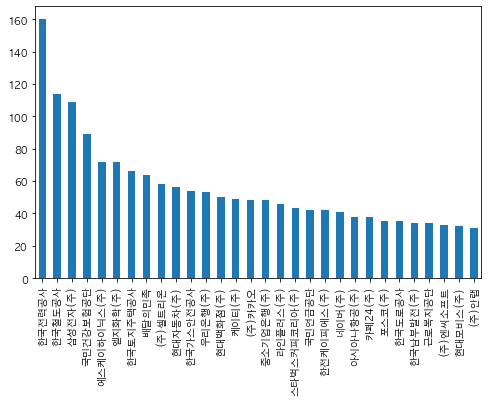

In [190]:
df.company.value_counts()[:30].plot(kind='bar', figsize = (8,5))
plt.show()

### 2-2. 2019년 50여개의 회사별 지원자의 직급 
- 사원 직급의 구직자들이 가장 활발하게 구직 활동을 하고 있다
- 직급이 높을수록 구직하는 비율이 현저히 낮아짐

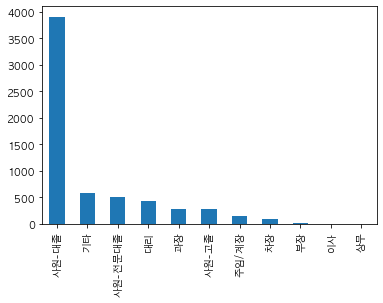

In [186]:
df.title.value_counts().plot(kind='bar', figsize = (6,4))
plt.show()

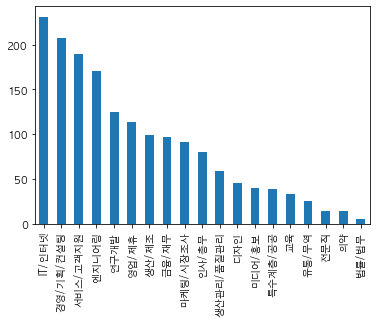

In [205]:
df.dptment[df.result == '합격'].value_counts().plot(kind = 'bar')
plt.show()

### 2-3. 2019년 50여개의 회사별 <사원-대졸>의 지원 부서
- IT/인터넷 부서와 서비스/고객지원 부서가 사원 직급의 구직자들에게 가장 인기가 있음
- 법률/법무, 영업/제휴, 인사/총무 부서에 낮은 지원율을 보임

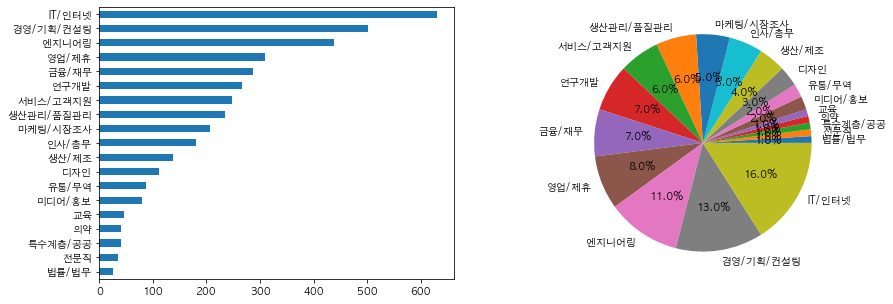

In [187]:
bar_pie_graph(df, 'dptment', 'title', '사원-대졸')

### 2-3. 2019년 50여개의 회사별 합격률
- 지원자의 반은 합격 했다고 추정 가능

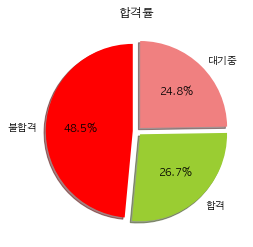

In [188]:
query = df['result'].value_counts()
total_sum = query.values.sum()
    
lab_lst = []
val_lst = []

for label, value in zip(query.index, query.values):
    lab_lst.append(label)
    val_lst.append(value)

ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',
                shadow = True, startangle = 90,
                explode = (0.05,0.05,0.05),
                colors = ['red','yellowgreen','lightcoral'])
sen ='합격률'

plt.title(sen)
plt.show()


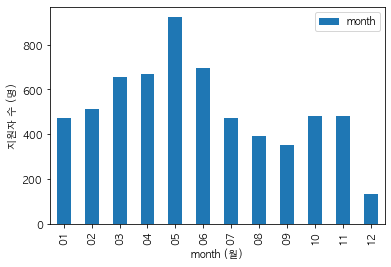

In [197]:
check_month = pd.DataFrame(df.month.value_counts(sort = True))
check_month = check_month.sort_index(ascending = True)
ax = check_month.plot(kind = 'bar')
ax.set_xlabel('month (월)')
ax.set_ylabel('지원자 수 (명)')
plt.show()

In [222]:
pass_5 = df[['title','region','company']][(df.result == '합격')]
pass_5.region.value_counts()

서울    899
경기    311
대전     96
전남     65
충남     46
인천     45
경남     39
대구     28
부산     27
경북     24
세종     18
충북     15
강원     12
제주     11
기타     10
울산     10
광주      8
전북      5
Name: region, dtype: int64

In [223]:
df.company.value_counts()[:20]

한국전력공사          160
한국철도공사          114
삼성전자(주)         109
국민건강보험공단         89
에스케이하이닉스(주)      72
엘지화학(주)          72
한국토지주택공사         66
배달의민족            64
(주)셀트리온          58
현대자동차(주)         56
한국가스안전공사         54
우리은행(주)          53
현대백화점(주)         50
케이티(주)           49
(주)카카오           48
중소기업은행(주)        48
라인플러스(주)         46
스타벅스커피코리아(주)     43
국민연금공단           42
한전케이피에스(주)       42
Name: company, dtype: int64

In [200]:
df.head(3)

,index,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary,year,month
0,0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001",2019,08
1,1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2019,04
2,2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001",2019,01


# 2. 빅히트엔터테인먼트에 지원하는 사람들의 특성
- 구직/구인 사이트의 면접 후기를 활용하여 지원자들의 특성 확인
    - 공시자료와 공공통계 자료는 귀사가 공식적으로 요구하여 취득 해야하므로 이번 분석에선 제외 함
- 잡 플래닛의 면접 후기로 지원자의 특성 확인
    - 타 구직/구인 사이트의 면접 후기를 볼 수 있는데 제약이 있습니다.
        - (개인계정 및 유료 회원에게만 한함)
    - 회사의 계정으로 로그인 시 현재의 제약이 미미할거라 추정하고 있습니다.
- 지원자를 크게 12개의 특성을 가지고 데이터를 수집
- 이후 단순 쿼리 분석으로 지원자의 특성을 파악

### 2-1. 지원자 직급 분석
- 지원자 직급 중 "사원-대졸"이 가장 많은 분포를 보임
- 초년생이 많다고 가정 할 수 있음

In [ ]:
bighit = df[df.company == '빅히트엔터테인먼트']

In [ ]:
bighit.title.value_counts().plot(kind = 'bar')
plt.title("지원자의 직급 분포")
plt.ylabel("지원자 수 ")
plt.show()

In [ ]:
def bar_pie_graph2(df, by):
    query = df[str(by)].value_counts(ascending = True)
    
    total_sum = query.values.sum()
    lab_lst = []
    val_lst = []
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    query.plot(kind = 'barh')
    plt.subplot(1,2,2)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0, explode = (0.05,0.05))  
    plt.show()

### 2-2. 지원자의 지원 부서
- 빅히트에는 미디어 홍보 부서로 지원하는 구직자가 가장 많은 것으로 나타남
- 마케팅/시장조사 부서 역시 인기 있는 부서임

In [ ]:
bar_pie_graph2(bighit,'dptment')

### 2-3. 지원자의 지원 경로
- 빅히트에는 온라인 지원과 헤드헌터의 지원 경로로 입사 지원이 많음

In [ ]:
bighit['route'].value_counts().plot(kind = 'bar', figsize = (5,3))
plt.show()

#### 2-4. 지원자의 합격률


In [ ]:
bar_pie_graph2(bighit,'result')

# 3. 빅히트 회사 이미지 Analysis
- 머신러닝/딥러닝을 이용한 한글 의미 분석
    - 모든 리뷰를 긁어서 데이터로 남겼지만, 모든 글을 읽는 것은 많은 시간과 집중이 요함
    - 편의를 위하여 머신러닝/딥러닝 모델을 이용하여 리뷰가 긍정적인지 부정적인지 나눌거임
- 한글의 형태소를 나눠 분석
    - 텍스트 분석은 단어의 형태소 명사, 조사, 형용사, 조사 등등에 큰 의미를 부여함
    - 모든 댓글을 형태소 단위로 나눠서 분석
- 네이버 영화/댓글 데이터로 긍정적인지 부정적인지 학습을 시킴 
    - (머신러닝/딥러닝 학습을 위해선 큰 데이터가 필요함 (최소 100만)
    - 1000만개의 댓글 데이터를 가지고 있는 네이버로 충분한 학습을 시킴
    - 시간이 굉장히 오래 걸린다는 단점 (일 단위)
- 네이버 데이터로 학습시킨 머신러닝/딥러닝을 빅히트 면접 후기에 적용
    - 긍정과 부정으로 나누게 실시함
    - 머신러닝/딥러닝의 정확성을 위해선 모델의 튜닝 작업이 필요 함
    - 튜닝 작업은 머신러닝/딥러닝 모델링 중 시간이 오래 걸리므로 기본 모델링으로 평가함 (정확성 83%)
- 리뷰 평가
    - 83%의 정확도를 고려하고 참고용으로 사용
    - 튜닝을 통하여 정확도를 95% 이상을 끌어 올릴시 상용화 가능함
    - 모델 튜닝은 고도화 작업이 필요하므로 하루 이틀만에 끝내기에는 무리가 있음
        - 여러 모델들을 조합하고 평가 분석 실시 해야함

In [ ]:
bighit.columns

In [ ]:
bighit.head()

In [ ]:
bar_pie_graph2(bighit,'experience')

### 3-1. Load Naver Data
- 네이버의 댓글 데이터로 머신 러닝 모델에 훈련

#### Train data

In [ ]:
train = pd.read_csv('ratings_train.txt', delimiter = "\t")
print(train.shape)
train.head()

#### Test data

In [ ]:
test = pd.read_csv('ratings_test.txt', delimiter = "\t")
print(test.shape)
test.head()

### 3-2. Data Preprocessing

#### Tokenizing

In [ ]:
from konlpy.tag import Okt
okt = Okt()

def re_norm(i):
    return re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]',"",str(i))

def tokenize(doc):
    return ['/'.join(i) for i in okt.pos(re_norm(doc))]

#### 훈련 데이터 토크나이징

In [ ]:
%%time
train_docs = []
for i in train.document:
    try:
        train_docs.append(tokenize(i))
    except TypeError:
        pass
len(train_docs)
train_docs[:2]

#### 테스트 데이터 토크나이징

In [ ]:
%%time
test_docs = []
for i in test.document:
    try:
        test_docs.append(tokenize(i))
    except TypeError:
        pass
len(test_docs)
test_docs[:2]

#### 토크나이징 된 훈련 데이터와 테스트 데이터 결과
- 훈련 데이터에 200만 단어 
- 테스트 데이터에 65만 단어

In [ ]:
train_tokens = [k for i in train_docs for k in i]
test_tokens = [k for i in test_docs for k in i]
print(len(train_tokens), len(test_tokens))

#### 유니크한 단어 개수 

In [ ]:
import nltk
train_text = nltk.Text(train_tokens, name = 'NMSC')
print("Total token count:",len(train_text.tokens))
print("Total Unique token count:",len(set(train_text.tokens)))

#### Bag of Words
- 가장 많이 쓰는 단어 10000개를 가지고 머신러닝 입력값에 인자값으로 사용

In [ ]:
common_words = train_text.vocab().most_common(10000)
common_words[:10]

In [ ]:
selected_word = [i[0] for i in common_words]
selected_word[:10]

In [ ]:
def term_frequency(doc):
    return [doc.count(i) for i in selected_word]


In [ ]:
%%time
x_train_pre = [term_frequency(i) for i in train_docs]
x_test_pre = [term_frequency(i) for i in test_docs]
y_train_pre = [i for i in train.label]
y_test_pre = [i for i in test.label]

In [ ]:
%%time
x_train = np.asarray(x_train_pre).astype('float32')
x_test = np.asarray(x_test_pre).astype('float32')
y_train = np.asarray(y_train_pre).astype('float32')
y_test = np.asarray(y_test_pre).astype('float32')

### 3-3. Basic Deep Learning Model

In [ ]:
from tensorflow.keras import models, layers, optimizers, losses, metrics

#### 2개 층을 이용한 딥러닝

In [ ]:
%%time
model = models.Sequential()
model.add(layers.Dense(64, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'softmax'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

#### 딥러닝 모델에게 20번 학습 시키기

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss')

In [ ]:
%%time
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.1,
                    batch_size = 32, callbacks = [early_stopping])

#### 딥러닝 결과 정확도 84%

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

ax2.plot(history.history['acc'])
ax2.plot(history.history['val_acc'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('acc')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

#### 딥러닝의 결과로 빅히트 면접 리뷰 긍정/부정 테스트

In [ ]:

def test_review(i):
    token = tokenize(i)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis = 0)
    score = float(model.predict(data))
    if score < 0.5:
        sentiment = "긍정"
        print(colored(sentiment,'blue'), round(score * 100,2),'% \n', i)
        print()
#     elif (score < 0.8) and (score >= 0.3):
#         print(colored("Neutral",'green'), round(score * 100,2),'% \n', i)
#         print()
    else:
        sentiment = "부정"
        print(colored(sentiment,'red'), round((1-score) * 100,2),'% \n', i)
        print()
    return sentiment

#### 빅히트 면접 후기 텍스트에 머신러닝/딥러닝 모델 적용하여 감정 분석

In [ ]:
val_lst = []
for i in bighit.thought:
    val = test_review(i)
    val_lst.append(val)

#### 기존 빅히트 데이터에 감정 분석 결과 파생 변수로 추가

In [ ]:
bighit['emotion'] = val_lst
bighit

#### 감정 분석 결과 
- 48% 긍정
- 52% 부정

In [ ]:
bar_pie_graph2(bighit,'emotion')

In [ ]:
bighit.to_csv('bighit.csv',index = False)

In [ ]:
from IPython.display import display
from IPython.display import HTML

In [ ]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [ ]:
dff = pd.read_csv('job_market.csv')
print(dff.shape)
dff.head()


In [ ]:
dff['on_date'].value_counts()

In [ ]:
first_check = soup.find_all('div',{'class':'content_top_ty2'})
first_check

In [ ]:
for i in single:
    print(i)

In [ ]:
for i in check:
    print(i)